In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import mibian
import numpy as np
import scipy as sp
import sys

## Matlabplot Display Parameters

In [2]:
# Display Plot within Jupyter Notebook
%matplotlib inline
# Default Plot Size
plt.rcParams['figure.figsize'] = [10, 10]

## Import Common Classes

In [3]:
%run common/Equity.ipynb

## Platform Dependent Environment Variables
Ensuring the home directory is used regardless of OS type:
- Windows OS : `HOMEDRIVE`
- Mac/Linux/Unix OS : `HOME`

In [33]:
env_home = os.getenv('HOMEDRIVE') if sys.platform.startswith('win') else os.getenv('HOME')

## Common Functions

### Scales Volatility for a defined period of time and specified "lookback in days"

In [ ]:
def scaled_vol(name, period, lookback_in_days):
    return equity(name, period).historical_volatility(lookback_in_days).min_max_scale('Rolling Volatility').df['Rolling Volatility Scaled']

## Load Vix Object, Historical Data | Scale Vol

In [46]:
# Data File Location
#vix_data = env_home + '/Documents/platypus/vix/vix_20200509.csv'
# Instantiate Vix Object
#vix = equity('vix', vix_data)
# Min Max Scale Field "Adj Close"
#vix.min_max_scale('Adj Close')
vix = equity('^VIX', '60d')
vix_data = vix.df
vix_data_scaled = scaled_vol('^VIX', '60d', 10)

## Load CITI Object, Historical Data | Scale Vol

In [55]:
# Load citi data
#citi_data = env_home + '/Documents/platypus/citi/citi_20200509.csv'
# Instantiate CITI Object
# Load Citi data
# Calculate Historical Volatility
#citi.historical_volatility(30)
# Min Max Scale Field "Adj Close"
#citi.min_max_scale('Adj Close')
# Min Max Scale Field "Rolling Volatility"
#citi.min_max_scale('Rolling Volatility')
citi = equity('C', '60d')
vix_data = citi.df
citi_data_scaled ['Volatility'] = scaled_vol('C', '60d', 10)

In [56]:
citi.df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-20,40.04,40.56,36.81,37.66,38163900,0.0,0
2020-03-23,37.16,37.75,34.26,35.02,33013300,0.0,0
2020-03-24,37.25,40.49,36.95,40.23,34100600,0.0,0
2020-03-25,41.87,44.23,39.02,41.42,38211100,0.0,0
2020-03-26,43.22,45.80,42.55,45.54,31528600,0.0,0


## Visualization of VIX and Citi

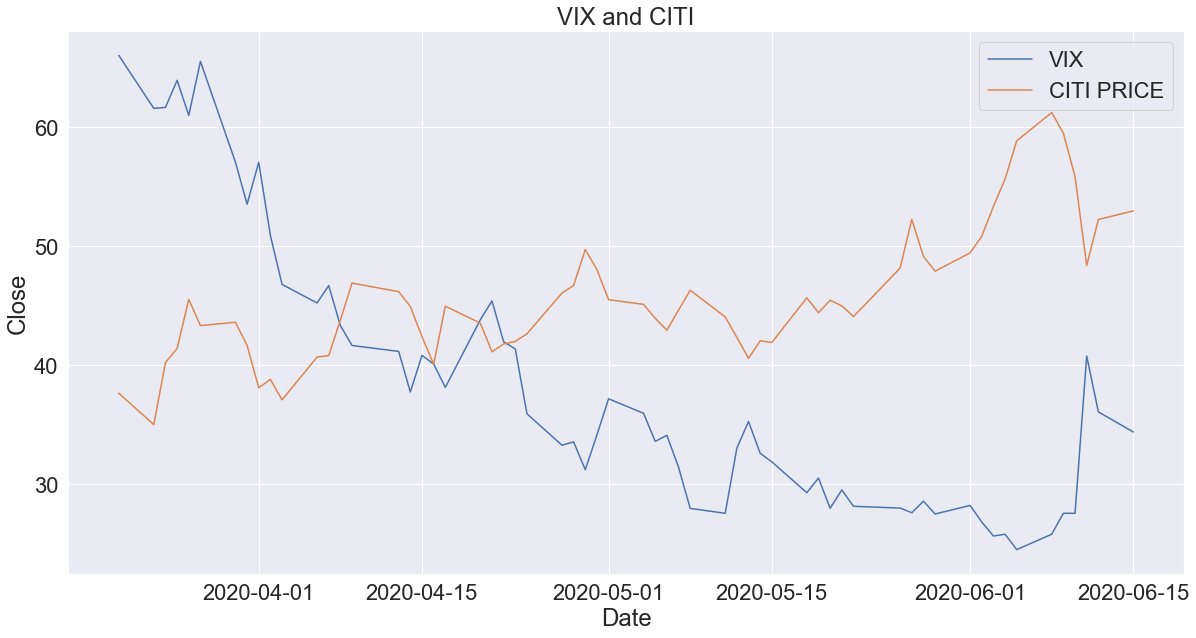

In [62]:
plt.plot(vix.df['Close'], label="VIX")
plt.plot(citi.df['Close'], label="CITI PRICE")
#plt.plot(citi_data_scaled['Volatility'], label="CITI VOLATILITY")
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('VIX and CITI')
plt.legend()
plt.show()

## Visualization of VIX and Citi (Min-Max Normalized)

In [ ]:
plt.plot(vix.df['Adj Close Scaled'], label="VIX")
plt.plot(citi.df['Adj Close Scaled'], label="CITI PRICE")
plt.plot(citi.df['Rolling Volatility Scaled'], label="CITI VOLATILITY")
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('VIX and CITI Normalized')
plt.legend()
plt.show()

## Investigating Correlation

In [ ]:
scaled_data = [pd.DataFrame(citi.df['Adj Close Scaled']), pd.DataFrame(citi.df['Rolling Volatility Scaled']), pd.DataFrame(vix.df['Adj Close Scaled'])]

In [ ]:
df_scaled = pd.concat(scaled_data, axis =1, join='outer', ignore_index=False, keys=['citiprice_scaled', 'citivol_scaled', 'vix_scaled'],
          levels=None, names=None, verify_integrity=False, copy=True)

In [ ]:
df_scaled = df_scaled.dropna(axis='rows')

In [ ]:
df_scaled.corr()

## Fitting Data Using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lr = LinearRegression()

### CITI Price vs CITI Volatility

In [ ]:
X = df_scaled['citiprice_scaled']
y = df_scaled['citivol_scaled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(X_train, y_train))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, X_train))

In [ ]:
citivol_y_pred = lr.predict(X_test)

In [ ]:
plt.scatter(X,y, color='black', label='Training')
plt.plot(X_test, citivol_y_pred, color='blue', linewidth=3, label='Prediction')
plt.xlabel('CITI Price')
plt.ylabel('CITI Volatility')
plt.title('CITI Price and CITI Volatility')
plt.legend()
plt.show()

### VIX vs CITI Volatility

In [ ]:
# vix vs citi vol
X = df_scaled['vix_scaled']
y = df_scaled['citivol_scaled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(X_train, y_train))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, X_train))

In [ ]:
citivol_y_pred = lr.predict(X_test)

In [ ]:
plt.scatter(X,y, color='black', label='Training')
plt.plot(X_test, citivol_y_pred, color='blue', linewidth=3, label='Prediction')
plt.xlabel('VIX')
plt.ylabel('CITI Volatility')
plt.title('VIX and CITI Volatility')
plt.legend()
plt.show()

### VIX vs CITI Price

In [ ]:
# vix vs citi price
X = df_scaled['vix_scaled']
y = df_scaled['citiprice_scaled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(X_train, y_train))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_train, X_train))

In [ ]:
citiprice_y_pred = lr.predict(X_test)

In [65]:
plt.scatter(X,y, color='black', label='Training')
plt.plot(X_test, citiprice_y_pred, color='blue', linewidth=3, label='Prediction')
plt.xlabel('VIX')
plt.ylabel('CITI Price')
plt.title('VIX and CITI Price')
plt.legend()
plt.show()

NameError: name 'X' is not defined

## Pair Trades

### Function: scaled_vol(ticker, period, lookback in days)
- Ticker: e.g. 'MAR'
- period: desired period to study
- lookback in days: number of days to calculate Vol, e.g. 10

In [66]:
def pair_heatmap(tickers):
    df = pd.DataFrame()
   
    for ticker in tickers:
        df[ticker] = scaled_vol(ticker, '180d', 10)
                 
    plt.rcParams['figure.figsize'] = (20.0, 10.0)
    sns.set(font_scale=2)
    return sns.heatmap(df.corr())

## All Travel Tickers
['RCL', 'CCL', 'MAR', 'HLT','H','WYNN','BKNG', 'EXPE', 'TZOO', 'LVS', 'MGM', 'CZR', 'BYD']

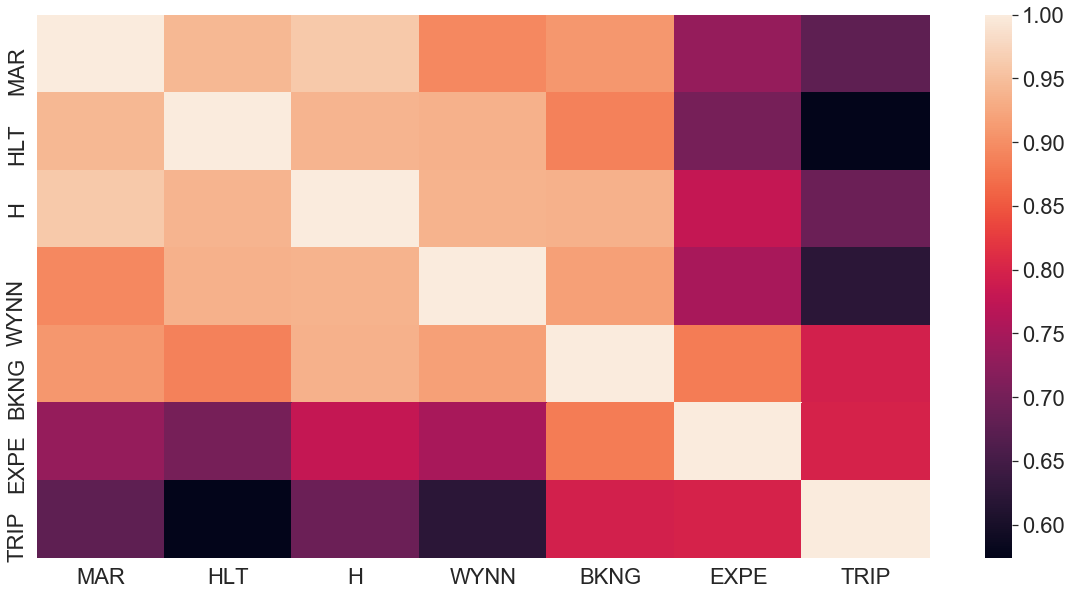

In [67]:
## OTA vs Hotels
tickers = ['MAR', 'HLT','H','WYNN','BKNG', 'EXPE','TRIP']
pair_heatmap(tickers)

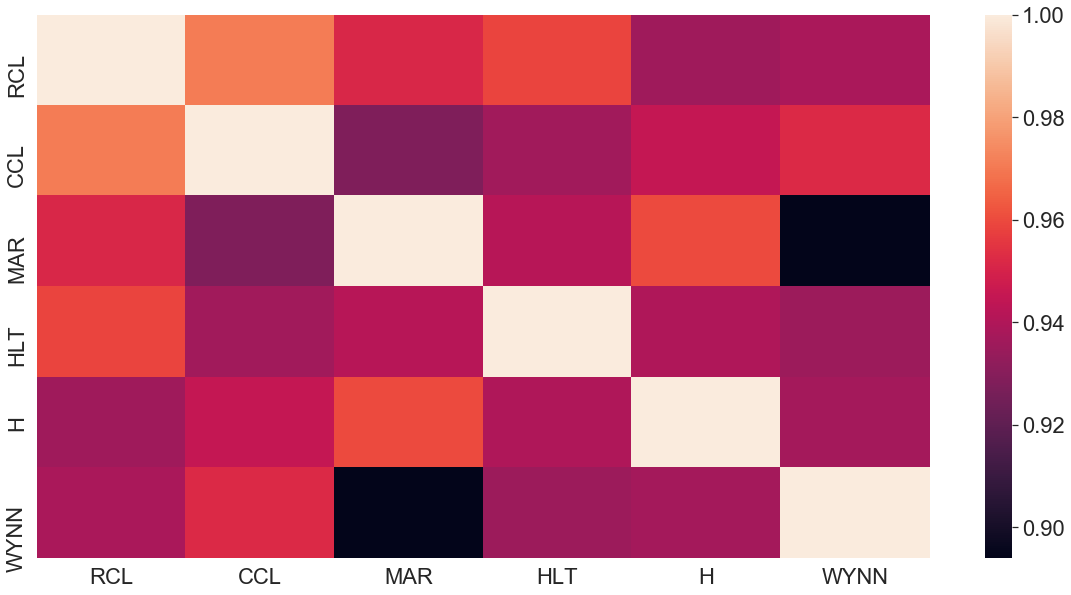

In [26]:
## Cruise vs Hotels
tickers = ['RCL', 'CCL', 'MAR', 'HLT','H','WYNN']
pair_heatmap(tickers)